<a href="https://colab.research.google.com/github/radhika004/CustomerSupportTickets/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis Dataset


In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


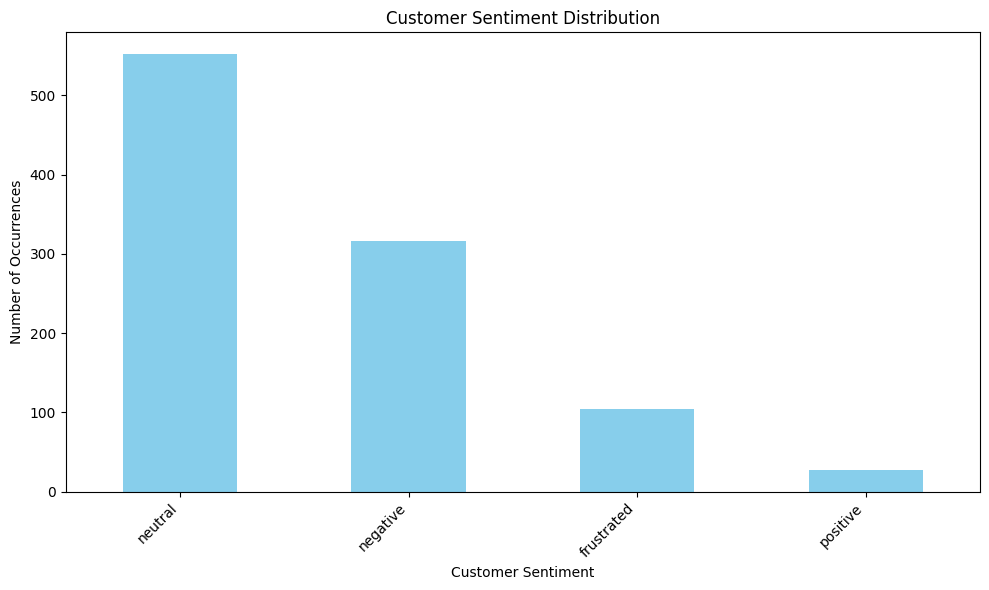

Customer Sentiment Counts:
 customer_sentiment
neutral       552
negative      316
frustrated    105
positive       27
Name: count, dtype: int64


In [ ]:
# prompt: issue area and customer_sentiment number

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a column 'customer_sentiment'
try:
    # Assuming 'df' is already loaded from the parquet file as shown in the provided code.
    # If not, uncomment and modify the following line to load your DataFrame
    # df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Count occurrences of each customer sentiment value
    sentiment_counts = df['customer_sentiment'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Customer Sentiment Distribution')
    plt.xlabel('Customer Sentiment')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print the sentiment counts in tabular form
    print("Customer Sentiment Counts:\n", sentiment_counts)


except KeyError:
    print("Error: 'customer_sentiment' column not found in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")

customer_sentiment         frustrated  negative  neutral  positive
issue_area                                                        
Cancellations and returns          42       100      144         0
Login and Account                   0        29      122         0
Order                              38       119       86        27
Shipping                            0        38       34         0
Shopping                           15        22       79         0
Warranty                           10         8       87         0


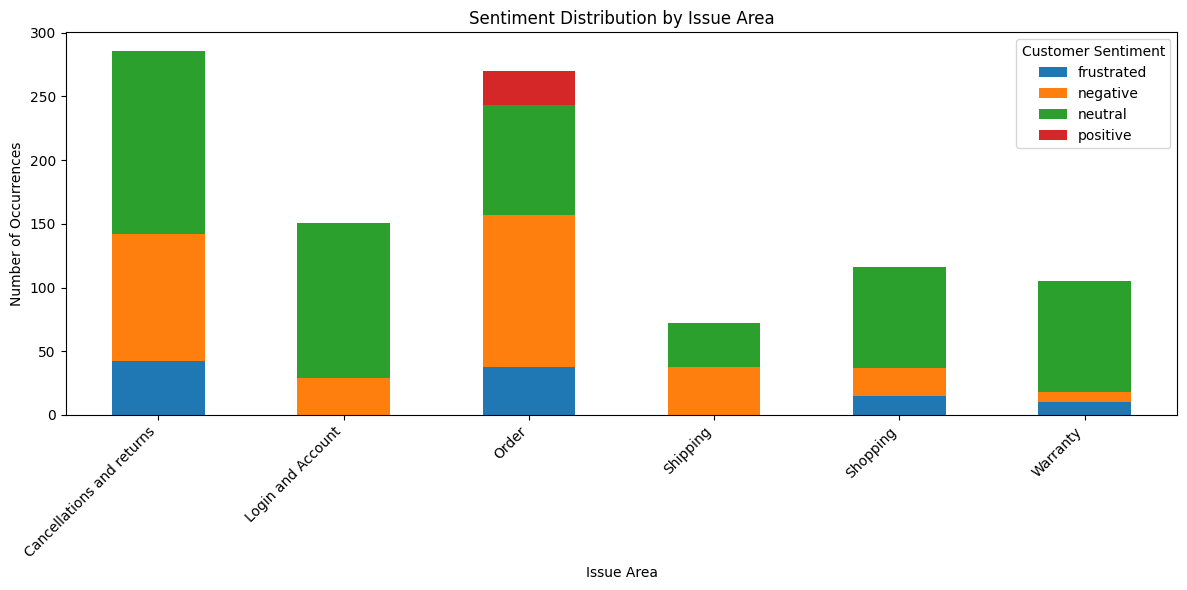

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Group by 'issue_area' and 'customer_sentiment', then count occurrences
    sentiment_by_issue = df.groupby(['issue_area', 'customer_sentiment']).size().unstack(fill_value=0)

    # Display the result
    print(sentiment_by_issue)

    # Plotting (optional)
    sentiment_by_issue.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Sentiment Distribution by Issue Area')
    plt.xlabel('Issue Area')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Sentiment')
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("Error: Parquet file not found.")
except KeyError as e:
    print(f"Error: Column not found: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

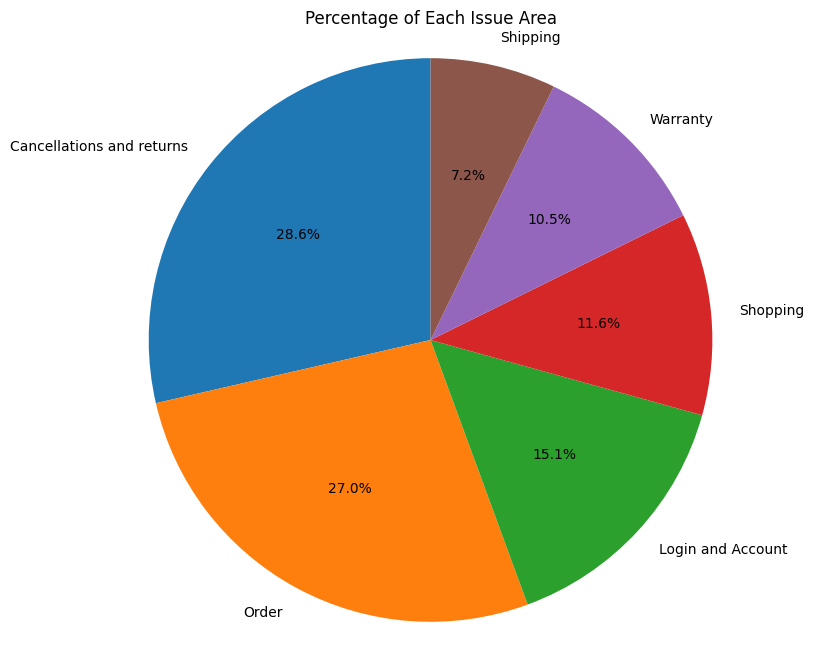

In [ ]:
# prompt: percent of each issue area in pie chart

import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Calculate the percentage of each issue area
    issue_area_counts = df['issue_area'].value_counts(normalize=True) * 100

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(issue_area_counts, labels=issue_area_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Percentage of Each Issue Area')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

except FileNotFoundError:
    print("Error: Parquet file not found.")
except KeyError:
    print("Error: 'issue_area' column not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

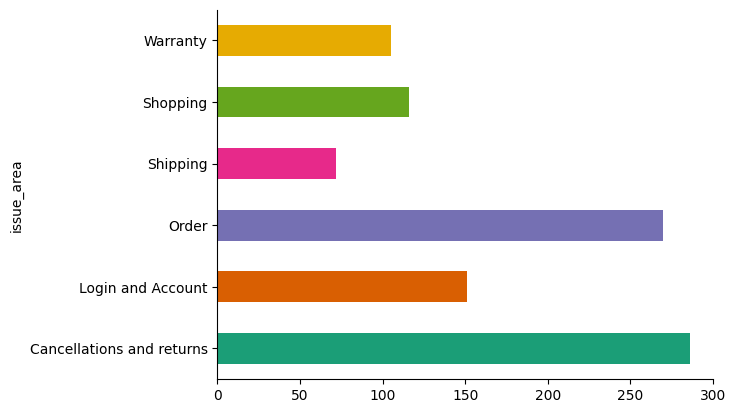

In [ ]:
# @title issue_area

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('issue_area').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: automate Login and Account related responses using groq

import pandas as pd
import matplotlib.pyplot as plt
import os
from groq import Groq
from matplotlib import pyplot as plt
import seaborn as sns

# ... (rest of your existing code)

def analyze_login_issue(title, chat_history):
    # Combine title and chat history
    input_text = f"Title: {title}\nChat History: {chat_history}"

    client = Groq(api_key="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")

    try:
        completion = client.chat.completions.create(
            model="llama3-8b-8192",
            messages=[
                {"role": "system", "content": "Analyze the following customer support ticket related to login issues. Identify the specific problem and suggest a solution. Classify the issue as 'password', 'account', or 'other'."},
                {"role": "user", "content": input_text},
            ],
            temperature=0.7,
            max_tokens=256,
            top_p=1,
            stream=False,
            stop=None
        )

        response = completion.choices[0].message.content.strip()

        # Basic issue classification (can be improved with more sophisticated logic)
        if "password" in response.lower():
            issue_type = "password"
        elif "account" in response.lower():
            issue_type = "account"
        else:
            issue_type = "other"

        return issue_type, response

    except Exception as e:
        print(f"Error analyzing login issue: {e}")
        return "error", "An error occurred during login issue analysis."

def save_login_analysis(ticket_id, issue_type, analysis):
  print(f"Ticket ID: {ticket_id}, Issue Type: {issue_type}, Analysis: {analysis}")
  # In a real application, save this data to a database or file.

# Example usage
ticket_id = 789
title = "Cannot log in"
chat_history = "User reports they cannot log in. They have tried several times but keep getting an error message."
issue_type, analysis = analyze_login_issue(title, chat_history)
save_login_analysis(ticket_id, issue_type, analysis)

ticket_id = 999
title = "Forgot password"
chat_history = "User forgot their password and needs to reset it."
issue_type, analysis = analyze_login_issue(title, chat_history)
save_login_analysis(ticket_id, issue_type, analysis)

Sentiment: negative
Reason: I would classify the sentiment of this user input as NEGATIVE. The reason is that the user is experiencing difficulties with logging in to their account, which is frustrating and inconvenient for them. The error message is also mentioned, which implies that the user is receiving a negative outcome, adding to the negative sentiment.
Sentiment: positive
Reason: Classifying the sentiment as: POSITIVE

Reason: The user stated that they "successfully" logged in, which implies a sense of accomplishment and ease of access to their account. The tone is optimistic and indicates a positive experience with the login process.


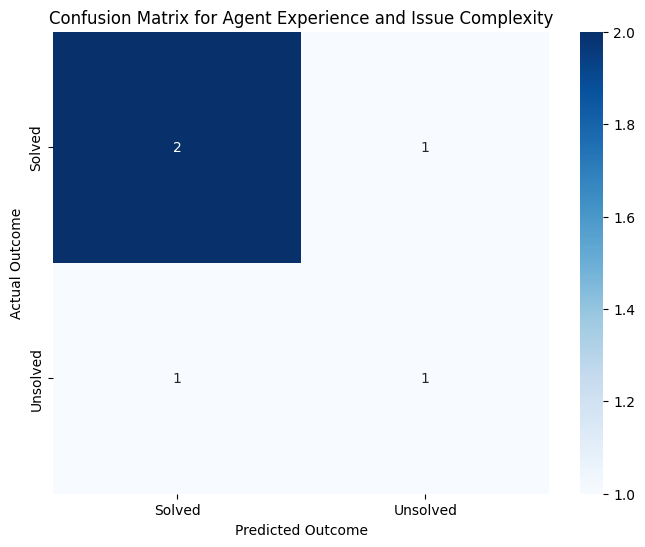

In [ ]:
# prompt: agent_experience_level and issue_complexity	 confusion matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame 'df' already exists and contains columns 'agent_experience_level', 'issue_complexity', and 'actual_outcome'
# Replace 'actual_outcome' with your column representing the true outcome
# Replace 'predicted_outcome' with your column representing the predicted outcome

try:
    # Example DataFrame creation. Replace this with your actual DataFrame loading.
    data = {'agent_experience_level': ['Junior', 'Senior', 'Junior', 'Senior', 'Junior'],
            'issue_complexity': ['Low', 'High', 'Medium', 'Low', 'High'],
            'actual_outcome': ['Solved', 'Solved', 'Unsolved', 'Solved', 'Unsolved'],
            'predicted_outcome': ['Solved', 'Solved', 'Solved', 'Unsolved', 'Unsolved']}  # Replace with your prediction results
    df = pd.DataFrame(data)

    # Example: Confusion Matrix for 'agent_experience_level' and 'issue_complexity'
    # Assuming 'actual_outcome' is the true outcome and 'predicted_outcome' is your model prediction
    cm = confusion_matrix(df['actual_outcome'], df['predicted_outcome'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Solved', 'Unsolved'], yticklabels=['Solved', 'Unsolved'])
    plt.xlabel("Predicted Outcome")
    plt.ylabel("Actual Outcome")
    plt.title("Confusion Matrix for Agent Experience and Issue Complexity")  # Set appropriate title
    plt.show()

except KeyError as e:
    print(f"Error: Column not found - {e}. Please check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
# prompt: issue_category and how many 	issue_sub_category	it have and their issue_complexity make its table using df

import pandas as pd

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Group by 'issue_category' and count the number of unique 'issue_sub_category'
    issue_summary = df.groupby('issue_category')['issue_sub_category'].nunique().reset_index()
    issue_summary = issue_summary.rename(columns={'issue_sub_category': 'Number of Subcategories'})

    # Merge with original df to get issue complexity information
    issue_summary = pd.merge(issue_summary, df[['issue_category', 'issue_complexity']], on='issue_category', how='left').drop_duplicates()

    print(issue_summary)


except FileNotFoundError:
    print("Error: Parquet file not found.")
except KeyError as e:
    print(f"Error: Column not found: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

                            issue_category  Number of Subcategories  \
0               Accessing Warranty Details                        2   
1               Accessing Warranty Details                        2   
3               Accessing Warranty Details                        2   
15   Account Reactivation and Deactivation                        2   
16   Account Reactivation and Deactivation                        2   
..                                     ...                      ...   
972                 Warranty Claim Process                        2   
973                 Warranty Claim Process                        2   
987             Warranty Terms and Changes                        2   
990             Warranty Terms and Changes                        2   
996             Warranty Terms and Changes                        2   

    issue_complexity  
0               high  
1               less  
3             medium  
15            medium  
16              less  
..       

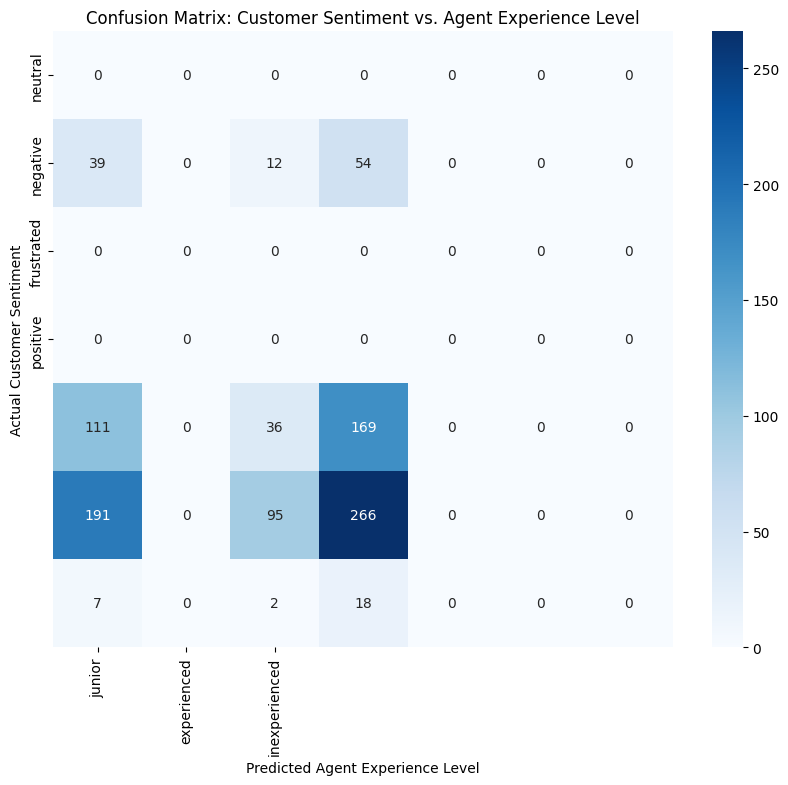

In [ ]:
# prompt: issue_sub_category and agent_experience_level make confusion matrix

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Assuming 'actual_outcome' represents the true outcome and you have a 'predicted_outcome' column
    # Replace 'predicted_outcome' with your actual prediction column if different

    # Create the confusion matrix
    cm = confusion_matrix(df['customer_sentiment'], df['agent_experience_level'])

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=df['agent_experience_level'].unique(),
                yticklabels=df['customer_sentiment'].unique())
    plt.xlabel("Predicted Agent Experience Level")
    plt.ylabel("Actual Customer Sentiment")
    plt.title("Confusion Matrix: Customer Sentiment vs. Agent Experience Level")
    plt.show()


except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your column names.")
except FileNotFoundError:
    print("Error: Parquet file not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
df.loc[df["agent_experience_level"].eq("experienced"), :]["customer_sentiment"].value_counts() / len(df.loc[df["agent_experience_level"].eq("experienced"), :]) * 100

,count
customer_sentiment,
neutral,54.885057
negative,31.896552
frustrated,11.206897
positive,2.011494


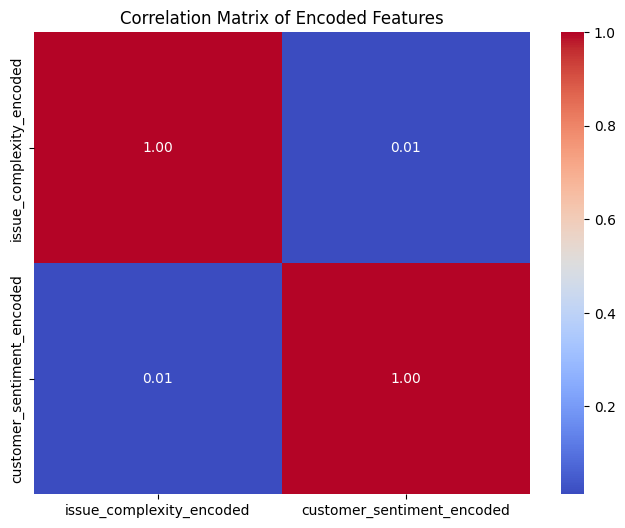

In [ ]:
# prompt: label encode issue_complexity and customer_sentiment and find correlation map

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Initialize LabelEncoder
    le = LabelEncoder()

    # Fit and transform 'issue_complexity'
    df['issue_complexity_encoded'] = le.fit_transform(df['issue_complexity'])

    # Fit and transform 'customer_sentiment'
    df['customer_sentiment_encoded'] = le.fit_transform(df['customer_sentiment'])

    # Calculate the correlation matrix
    correlation_matrix = df[['issue_complexity_encoded', 'customer_sentiment_encoded']].corr()

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Encoded Features')
    plt.show()

except FileNotFoundError:
    print("Error: Parquet file not found.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

agent_experience_level  customer_sentiment
experienced             neutral               54.885057
                        negative              31.896552
                        frustrated            11.206897
                        positive               2.011494
inexperienced           neutral               65.517241
                        negative              24.827586
                        frustrated             8.275862
                        positive               1.379310
junior                  neutral               52.465483
                        negative              33.333333
                        frustrated            10.650888
                        positive               3.550296
Name: proportion, dtype: float64


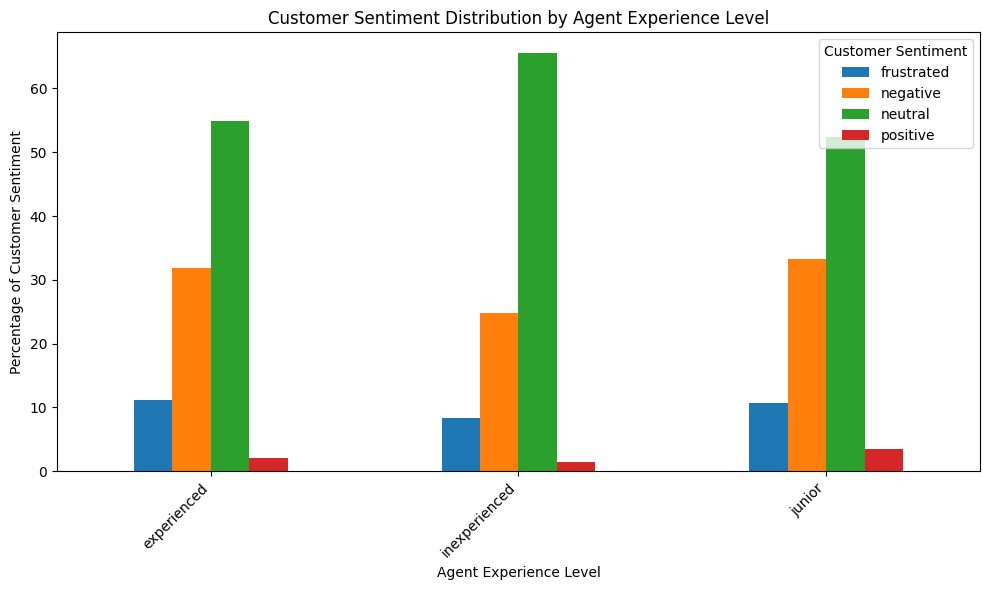

In [ ]:

# customer sentiment distribution by agent experience level
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

try:
    df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

    # Group by 'agent_experience_level' and get the value counts of 'customer_sentiment'
    agent_experience_sentiment = df.groupby('agent_experience_level')['customer_sentiment'].value_counts(normalize=True) * 100

    # Print the results
    print(agent_experience_sentiment)

    # Create a bar plot
    agent_experience_sentiment.unstack().plot(kind='bar', figsize=(10, 6))
    plt.title('Customer Sentiment Distribution by Agent Experience Level')
    plt.xlabel('Agent Experience Level')
    plt.ylabel('Percentage of Customer Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Customer Sentiment')
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("Error: Parquet file not found.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")